### Intro

Since the data is too large, after opening pisa2012.csv from Excel and reading the description of the field, I only select some fields to observe the data, and have the following problems:

| Column   | Description                                  |
| -------- | -------------------------------------------- |
| CNT      | Country code 3-character                            |
| ST03Q02  | Birth -Year                                    |
| ST04Q01  | Gender                                         |
| ST11Q01  | At Home - Mother             |
| ST11Q02  | At Home - Father              |
| PV1MATH  | Plausible value 1 in mathematics                            |
| PV2MATH  | Plausible value 2 in mathematics                            |
| PV3MATH  | Plausible value 3 in mathematics                            |
| PV4MATH  | Plausible value 4 in mathematics                            |
| PV5MATH  | Plausible value 5 in mathematics                           |
| PV1READ  | Plausible value 1 in reading                                  |
| PV2READ  | Plausible value 2 in reading                                  |
| PV3READ  | Plausible value 3 in reading                                  |
| PV4READ  | Plausible value 4 in reading                                  |
| PV5READ  | Plausible value 5 in reading                                  |
| PV1SCIE  | Plausible value 1 in science                            |
| PV2SCIE  | Plausible value 2 in science                            |
| PV3SCIE  | Plausible value 3 in science                            |
| PV4SCIE  | Plausible value 4 in science                            |
| PV5SCIE  | Plausible value 5 in science                            |
| COBN_F   | Country of Birth National Categories- Father                      |
| COBN_M   | Country of Birth National Categories- Mother                      |
| COBN_S   | Country of Birth National Categories- Self                      |

1. A very old question, is the boy's mathematics better, and the girl reading?
2. Is it better to have a child with a parent at home?
2. Are the scores of students in different countries more high?
3. Which countries have better scores in which subjects? (For example: Is the mathematics in Asian countries good? Is the European country reading well?)
4. The more parents may represent the children at home, does it have anything to do with the child's score?

## Data Wrangling

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [27]:
df = pd.read_csv('pisa2012.csv',encoding="cp1252", sep=',');

/Users/ray/anaconda3/envs/generic/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df = df[['CNT', 'ST03Q02', 'ST04Q01', 'ST11Q01', 'ST11Q02',
         'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 
         'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'COBN_F',  'COBN_M',  'COBN_S']]

Fields ST11Q01, ST11Q02 are described as Mother/Father at Home, and Nan is temporarily replaced by Yes.

In [29]:
df['ST11Q01'].fillna('Yes', inplace=True)
df['ST11Q01'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['ST11Q02'].fillna('Yes', inplace=True)
df['ST11Q02'].replace({'No': 0, 'Yes': 1}, inplace=True);

For math, reading, and science scores, sum the averages to get an approximate value

In [30]:
#New field: total average score for each subject
df['Avg Math Score'] = (df['PV1MATH'] + df['PV2MATH'] + df['PV3MATH'] + df['PV4MATH'] + df['PV5MATH']) / 5
df['Avg Reading Score'] = (df['PV1READ'] + df['PV2READ'] + df['PV3READ'] + df['PV4READ'] + df['PV5READ']) / 5
df['Avg Science Score'] = (df['PV1SCIE'] + df['PV2SCIE'] + df['PV3SCIE'] + df['PV4SCIE'] + df['PV5SCIE']) / 5
#New field: maximum score for each subject
df['Max Math Score'] = df[['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH']].max(axis=1)
df['Max Reading Score'] = df[['PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ']].max(axis=1)
df['Max Science Score'] = df[['PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']].max(axis=1)
#Remove the original field
df.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

In [31]:
#Rename
df.rename({'CNT': 'Country Code', 'ST03Q02': 'Birth Year', 'ST04Q01': 'Gender',
           'ST11Q01': 'Mother at Home', 'ST11Q02': 'Father at Home', 
           'STUDREL': 'Teacher Student Relations', 'TCHBEHFA': 'Teacher Behavior',
           'COBN_S': 'Birth Country', 'COBN_M': 'Birth Country of Mother',
           'COBN_F': 'Birth Country of Father',
           'EXAPPLM': 'Experience with Applied Math in School',
           'EXPUREM': 'Experience with Pure Math in School',
           'Avg Science Score': 'Average Science Score',
           'Avg Math Score': 'Average Math Score',
           'Avg Reading Score': 'Average Reading Score',
           'WEALTH': 'Wealth'}, axis='columns', inplace=True)

In [32]:
df.head()

,Country Code,Birth Year,Gender,Mother at Home,Father at Home,Birth Country of Father,Birth Country of Mother,Birth Country,Average Math Score,Average Reading Score,Average Science Score,Max Math Score,Max Reading Score,Max Science Score
0,Albania,1996,Female,1,1,Albania,Albania,Albania,366.18634,261.01424,371.91348,406.8469,406.8496,408.8400
1,Albania,1996,Female,1,1,Albania,Albania,Albania,470.56396,384.68832,478.12382,486.1427,406.2936,548.9929
2,Albania,1996,Female,1,1,Albania,Albania,Albania,505.53824,405.18154,486.60946,533.2684,431.3938,512.7191
3,Albania,1996,Female,1,1,Albania,Albania,Albania,449.45476,477.46376,453.97240,498.6836,547.3630,481.5740
4,Albania,1996,Female,1,1,Albania,Albania,Albania,385.50398,256.01010,367.15778,418.5309,311.7707,422.1746


The following amendments are made to the country name. The revised principle is:
1. Query [Country codes according to ISO-3166] (https://laendercode.net/en/) to confirm unfamiliar country abbreviations and indicate them by full name
2. If the name of a particular country is revised to the country's abbreviation, if the special city education is independent of the country as a whole, then the city name
3. Unknown if the name is displayed as a regional place name (for example: Latin America)

In [33]:
def modify_country_names(item):
    """ 
    This function will correct the country abbreviations and different names 
    but actually the name of the same country 
    """

    item = item.strip()
    if item.find('United Kingdom') != -1:
        return 'UK'
    elif item.find('United States') != -1:
        return 'USA'
    elif item.find('United States of America') != -1:
        return 'USA'
    elif item.find('Another American country [URY]') != -1:
        return 'Uruguay'
    elif item.find('Another country within the European Union (ITA)') != -1:
        return 'Italy'
    elif item.find('Another province in mainland China (QCN)') != -1:
        return 'China'
    elif item.lower().find('another country (') != -1:
        if item[17:20] == 'QUK':
            return 'Unknown'
        if item[17:20] == 'QSC':
            return 'Unknown'
        if item[17:20] == 'QCN':
            return 'China'
        if item[17:20] == 'TAP':
            return 'Myanmar'
        if item[17:20] == 'NLD':
            return 'Netherlands'
        return item[17:20]
    if item.find('ARE') != -1:
        return 'United Arab Emirates'
    elif item.find('ESP') != -1:
        return 'Spain'
    elif item.find('PRT') != -1:
        return 'Portugal'
    elif item.find('Other European country (NLD)') != -1:
        return 'Netherlands'
    elif item.find('Slovak Republic') != -1:
        return 'Slovakia'
    elif item.find('LUX') != -1:
        return 'Luxembourg'
    elif item.find('Hong Kong') != -1:
        return 'Hong Kong'
    elif item.find('QSC') != -1:
        return 'Unknown'
    elif item.find('An Eastern European country') != -1:
        return 'Unknown'
    elif item.find('A European country') != -1:
        return 'Unknown'
    elif item.find('An Eastern European country outside the EU') != -1:
        return 'Unknown'
    elif item.find('A Sub-Saharan country (Africa excl. Maghreb)') != -1:
        return 'Unknown'
    elif item.find('Serbia, Montenegro and Kosovo') != -1:
        return 'Serbia'
    elif item.find('In another former USSR republic (KAZ)') != -1:
        return 'Kazakhstan'
    elif item.find('Macao') != -1:
        return 'China'
    elif item.find('China') != -1:
        return 'China'
    elif item.find('United States') != -1:
        return 'USA'
    elif item.find('South, Latin  and Central America') != -1:
        return 'Unknown'
    elif item.find('African country with Portuguese as the official') != -1:
        return 'Lusophone Africa'
    elif item.find('Bolivia (Plurinational State of)') != -1:
        return 'Bolivia'
    elif item.find('Invalid') != -1:
        return 'Unknown'
    elif item.find('Middle Eastern country') != -1:
        return 'Unknown'
    elif item == 'Chinese Taipei':
        return 'Taiwan'
    elif item == 'Africa':
        return 'Unknown'
    elif item == 'Czechia':
        return 'Czech Republic'
    elif item == 'United Arab Emirates':
        return 'UAE'
    elif item == 'Russian Federation':
        return 'Russia'
    elif item == 'Republic of Korea':
        return 'Korea'
    elif item == 'Iran, Islamic Republic of':
        return 'Iran'
    elif item == 'Netherlands Antilles':
        return 'Netherlands'
    elif item == 'Missing':
        return 'Unknown'
    elif item == 'Occupied Palestinian Territory':
        return 'Unknown'
    elif item == 'nan':
        return 'Unknown'
    elif len(item) > 30:
        return 'Unknown'
    return item

In [34]:
# apply the defined function for all names of countries
df['Birth Country'] = df['Birth Country'].astype(str)
df['Birth Country'] = df['Birth Country'].apply(modify_country_names)
df['Birth Country of Mother'] = df['Birth Country of Mother'].astype(str)
df['Birth Country of Mother'] = df['Birth Country of Mother'].apply(modify_country_names)
df['Birth Country of Father'] = df['Birth Country of Father'].astype(str)
df['Birth Country of Father'] = df['Birth Country of Father'].apply(modify_country_names)

In [35]:
# 國家名稱統一
df = df.replace(['Connecticut (USA)', 'Florida (USA)', 'Massachusetts (USA)', 'United States of America'], 'USA')
df = df.replace(['Perm(Russian)', 'Russian Federation', 'Perm(Russian Federation)'], 'Russia')
df = df.replace('United Kingdom', 'UK')
df = df.replace('United Arab Emirates', 'UAE')
df = df.replace(['China-Shanghai'], 'China')
df = df.replace(['Hong Kong-China'], 'Hong Kong')
df = df.replace('Chinese Taipei', 'Taiwan')
df = df.replace('United States', 'USA')
df = df.replace('Korea, Republic of', 'Korea')
df = df.replace('Czechia', 'Czech')
df = df.replace('Czech Republic', 'Czech')
df = df.replace('Hong Kong-China', 'Hong Kong')
df = df.replace('Macao-China', 'China')
df = df.replace('Slovak Republic', 'Slovakia')
df = df.replace('Macao', 'China')
df = df.replace('Bosnia and Herzegovina', 'Bosnia')

Finally, the deposited data will be saved separately.

In [36]:
df.to_csv('pisa_data_clean.csv')

### Exploratory Data Analysis

Now that we have cleaned up the data, we started to explore and analyze the data.

In [37]:
df_clean = pd.read_csv('pisa_data_clean.csv')

First, let's look at the distribution of student numbers in countries.

From the number of students in the country, the number of students in the country where the students were born, the number of students in the country where the students were born, and the number of students in the country where the students were born, these four histograms have the same points of most students coming to Mexico, Italy, Spain, Canada.

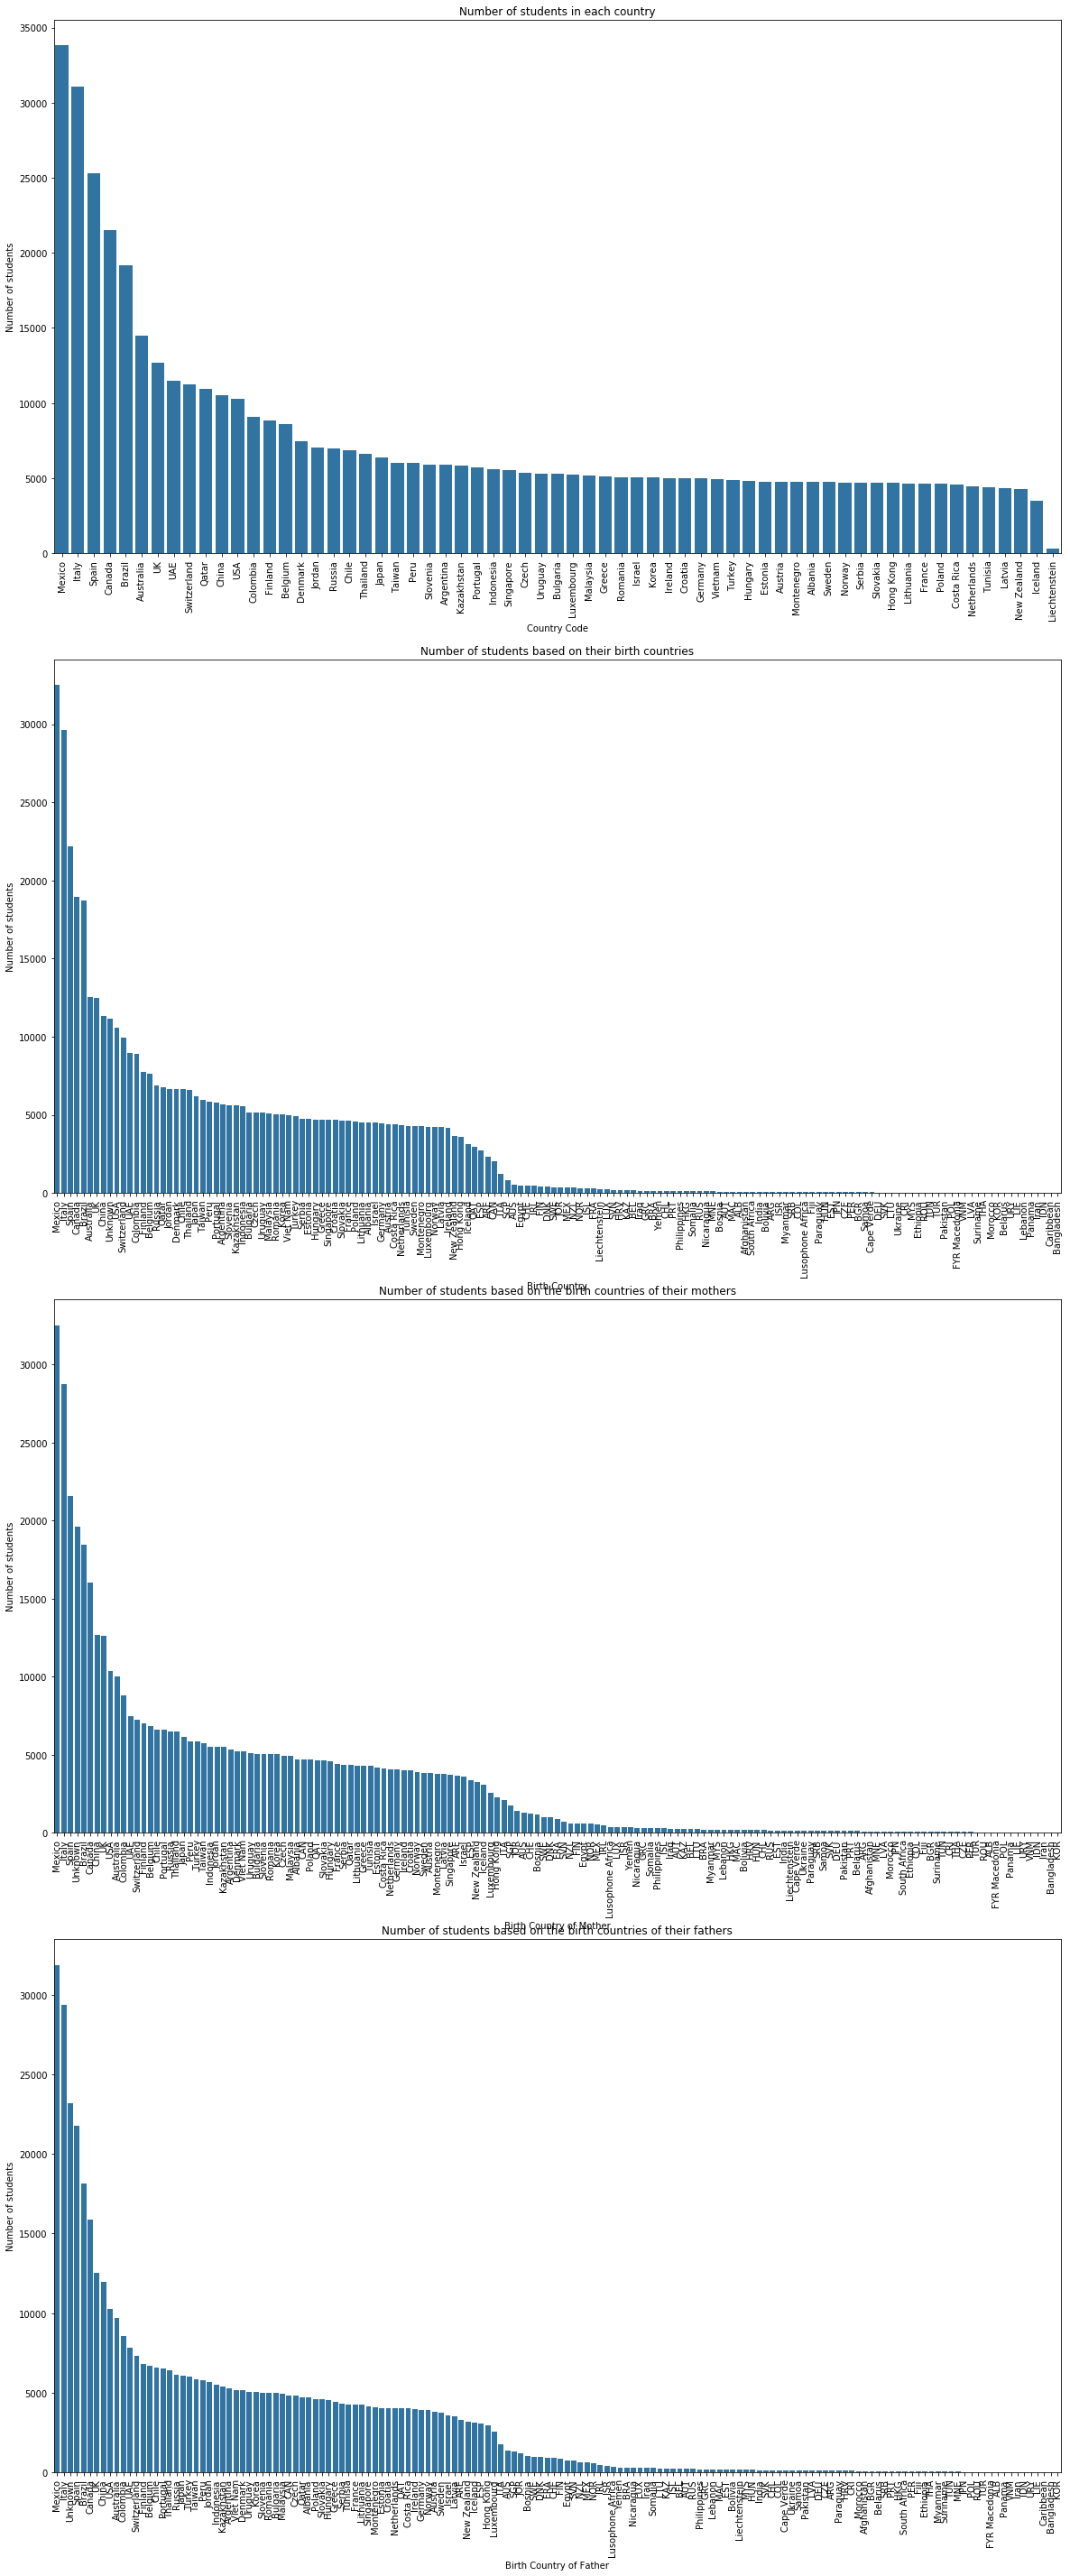

In [38]:
plt.figure(figsize = [20, 50])

plt.subplot(4, 1, 1)
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'Country Code', color = base_color, order=df_clean['Country Code'].value_counts().index)
plt.title('Number of students in each country')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 2)
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'Birth Country', color = base_color, order=df_clean['Birth Country'].value_counts().index)
plt.title('Number of students based on their birth countries')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 3)
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'Birth Country of Mother', color = base_color, order=df_clean['Birth Country of Mother'].value_counts().index)
plt.title('Number of students based on the birth countries of their mothers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

plt.subplot(4, 1, 4)
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'Birth Country of Father', color = base_color, order=df_clean['Birth Country of Father'].value_counts().index)
plt.title('Number of students based on the birth countries of their fathers')
plt.xticks(rotation='vertical');
plt.ylabel('Number of students');

Next, we divided the male and female students to observe the scores of male and female students; the results did seem to be slightly higher for female students; and the results of science and mathematics did not differ between men and women, and the scores were roughly similar.

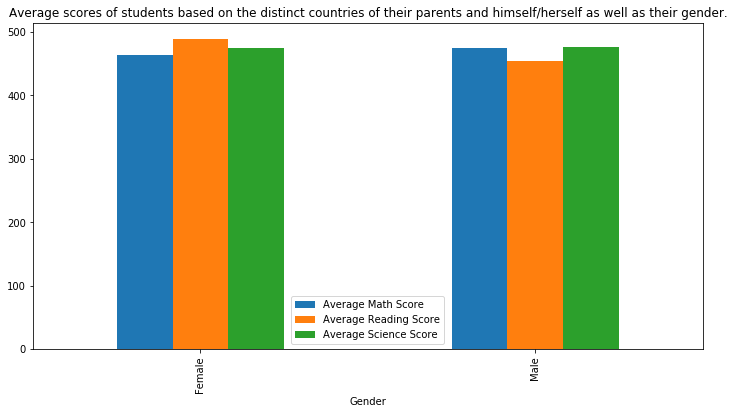

In [39]:
res = df_clean.groupby(['Gender']).mean()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = res.plot.bar(figsize=(12,6));
plt.title('Average scores of students based on the distinct countries of their parents and himself/herself as well as their gender.');

Again, from the student's background, first observe whether there are student scores accompanying parents at home.

As a result, if at least one of the parents is at home, the score is higher than the child whose parents are not at home.

In [40]:
# Sum the values of Mother at Home and Father at Home
# 0: Representing parents are not at home
# 1: Representing one of the parents at home
# 2: Both parents are at home
df_clean['Parent at Home'] = df_clean['Mother at Home'] + df_clean['Father at Home']

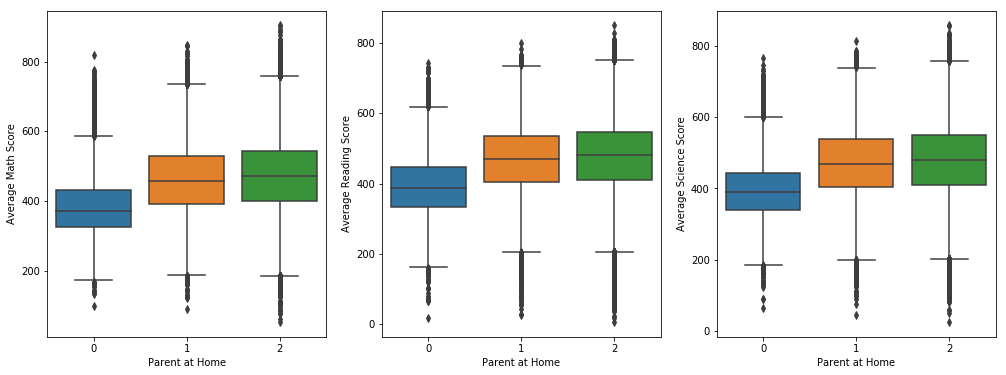

In [41]:
plt.figure(figsize = [17, 6])
base_color = sb.color_palette()[0]
plt.subplot(1, 3, 1)
sb.boxplot(x = df_clean['Parent at Home'], y = df_clean['Average Math Score']);
plt.subplot(1, 3, 2)
sb.boxplot(x = df_clean['Parent at Home'], y = df_clean['Average Reading Score']);
plt.subplot(1, 3, 3)
sb.boxplot(x = df_clean['Parent at Home'], y = df_clean['Average Science Score']);

Then, their parents have similar birthplaces. Here we do a calculation. If the student and their parents are both born in the same country, the number is 1, and if one of the parents is born in a different country than the student, the number is 2. Finally, the number 3 shows that both parents and students were born in different countries. From the bar chart, most students are born in the same country as their parents.

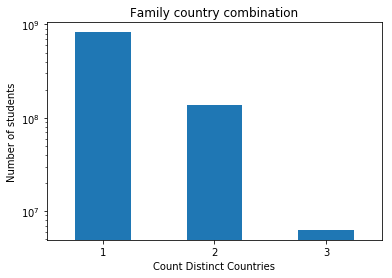

In [42]:
def count_distinct_countries(str):
    """
    Here's going to compute a count which shows the different countries for monter, father, and the student.
    1 means all three are born in the same country
    2 means two of them are born in different countries
    3 means all of them are birn in different country
    """
    s = set()
    for t in str.split(","):
        s.add(t)
    return len(s)

# The three country names of mother, father, and the student are merged to one string for the later process
df_clean['Merged Birth Countries'] = df_clean['Birth Country of Mother'] + "," +  df_clean['Birth Country of Father'] + "," + df_clean['Birth Country'];

# we apply the previously defined function to the merged names of countries to compute the representing number of 
# different birth countries 
df_clean['Count Distinct Countries'] = df_clean['Merged Birth Countries'].apply(count_distinct_countries);
res = df_clean.groupby('Count Distinct Countries').sum()['Birth Year']
res.plot.bar(logy=True)
plt.title('Family country combination')
plt.ylabel('Number of students');
plt.xticks(rotation='horizontal');

Does the different birthplaces of parents affect student scores? As a result, we can't see any difference.

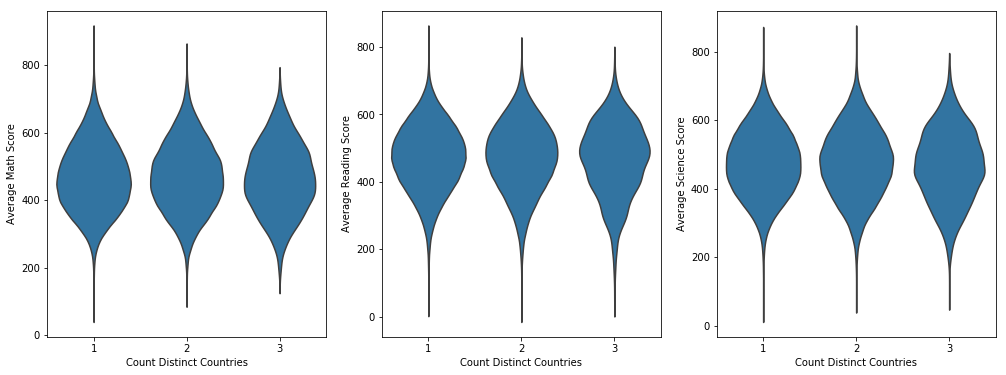

In [43]:
plt.figure(figsize = [17, 6])
base_color = sb.color_palette()[0]
plt.subplot(1, 3, 1)
sb.violinplot(data = df_clean, x = 'Count Distinct Countries', y = 'Average Math Score', color = base_color, inner = None)

plt.subplot(1, 3, 2)
sb.violinplot(data = df_clean, x = 'Count Distinct Countries', y = 'Average Reading Score', color = base_color, inner = None)

plt.subplot(1, 3, 3)
sb.violinplot(data = df_clean, x = 'Count Distinct Countries', y = 'Average Science Score', color = base_color, inner = None);

However, when we observed men and women separately, we immediately found that the differences between boys were quite prominent. When the family background came from different countries, the comprehensive scores of male students were relatively prominent.

<Figure size 3600x1440 with 0 Axes>

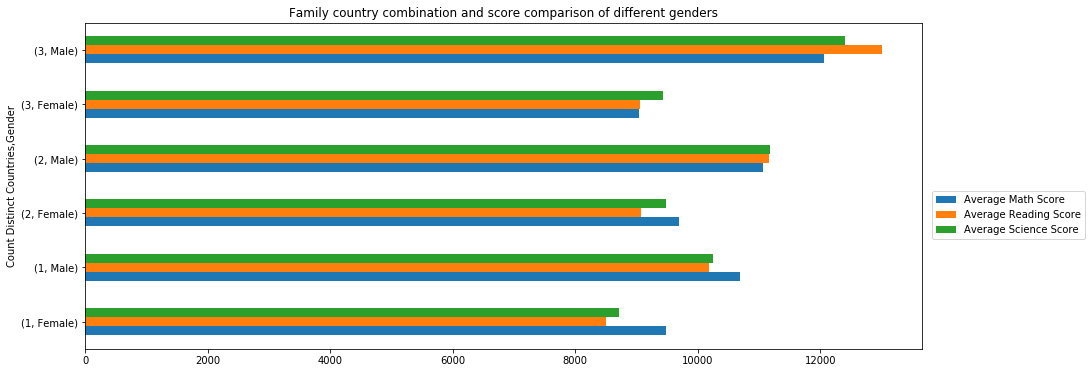

In [44]:
plt.figure(figsize = [50, 20])
res = df_clean.groupby(['Count Distinct Countries','Gender']).var()[['Average Math Score', 'Average Reading Score', 'Average Science Score']]
ax = res.plot.barh(figsize=(15,6));
ax.legend(bbox_to_anchor=(1.2, 0.5))
# plt.subplots_adjust(top = 1.4)
plt.title('Family country combination and score comparison of different genders')
plt.xticks(rotation='horizontal');

Now, we can consider all students from all countries to analyze the distribution and relevance of mathematics, reading and scientific achievement.

It seems that the relationship between each subject is highly positively correlated, which also means that the three subjects are closely related to each other.

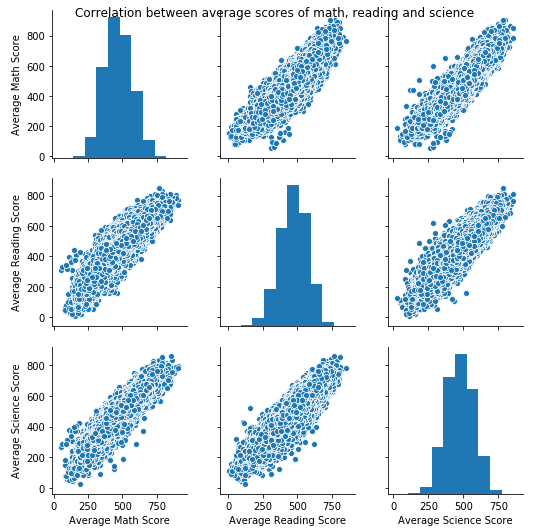

In [45]:
pair_plot = sb.pairplot(data = df_clean, vars=["Average Math Score", "Average Reading Score", "Average Science Score"]);
pair_plot.fig.suptitle("Correlation between average scores of math, reading and science");

Here, we observe the distribution of different scores according to different countries.

Interesting thing,
- Mathematics: East Asian countries such as China, South Korea, Taiwan, Singapore, and Hong Kong have higher average math scores.
- Science: Singapore is more prominent
- Reading: Italy, Australia, Belguim, Singapore, South Korea, China, Japan all performed well

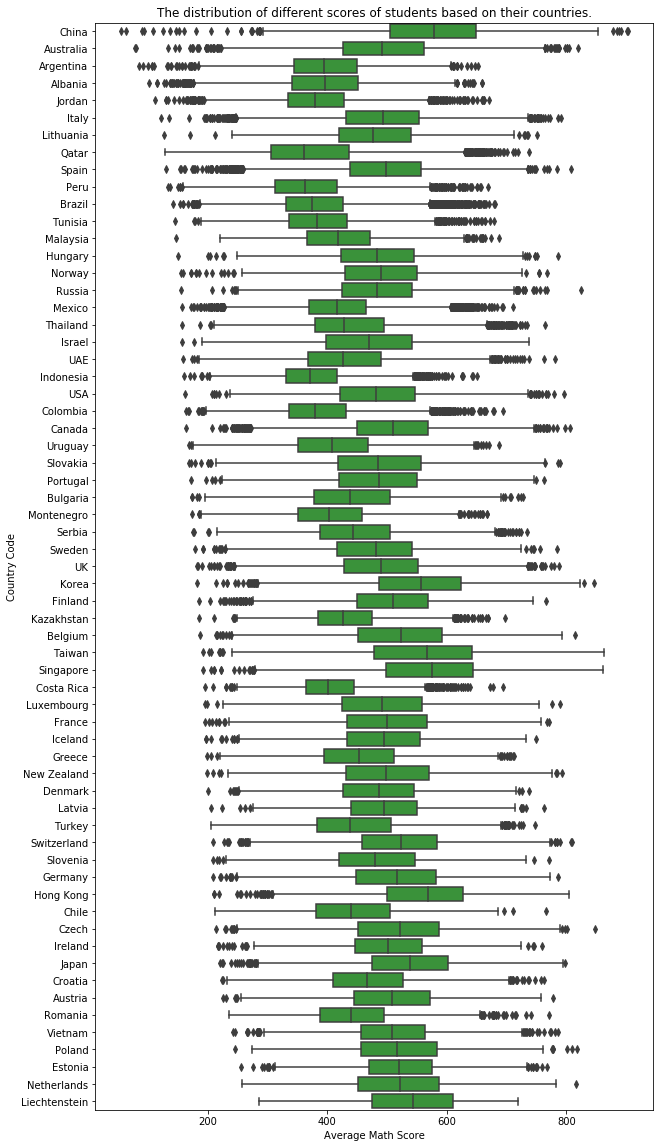

In [46]:
plt.figure(figsize = [10, 20])
df_sorted = df_clean.sort_values(by='Average Math Score')
sb.boxplot(x = df_sorted['Average Math Score'], y = df_sorted['Country Code'], color=sb.color_palette()[2]);
plt.title('The distribution of different scores of students based on their countries.');

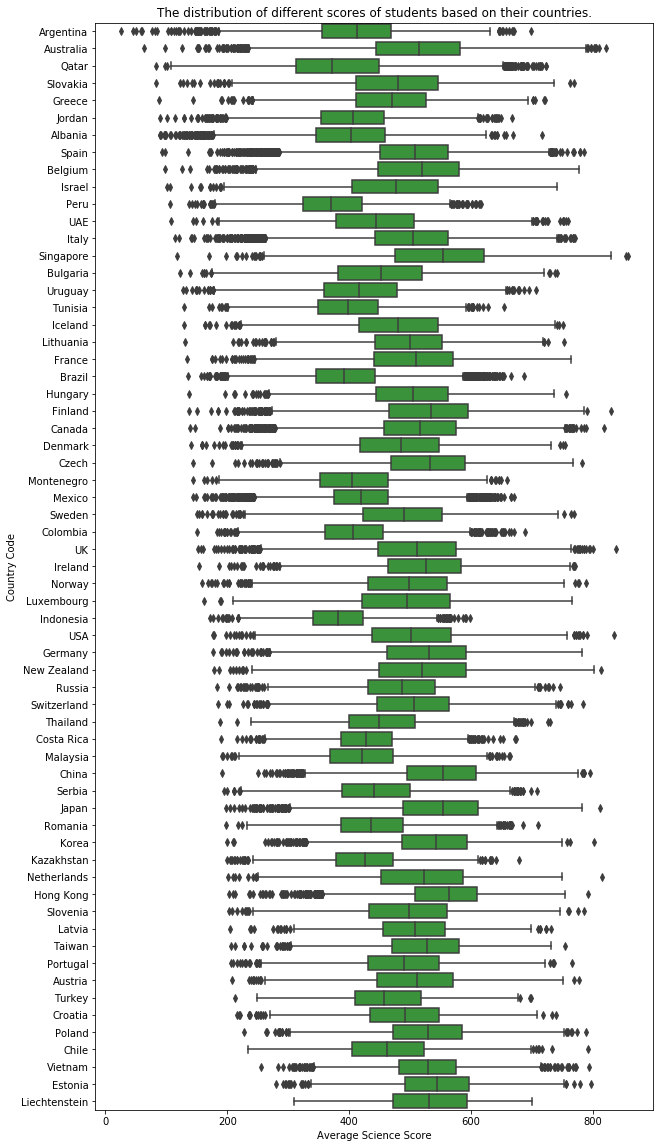

In [47]:
plt.figure(figsize = [10, 20])
df_sorted = df_clean.sort_values(by='Average Science Score')
sb.boxplot(x = df_sorted['Average Science Score'], y = df_sorted['Country Code'], color=sb.color_palette()[2]);
plt.title('The distribution of different scores of students based on their countries.');

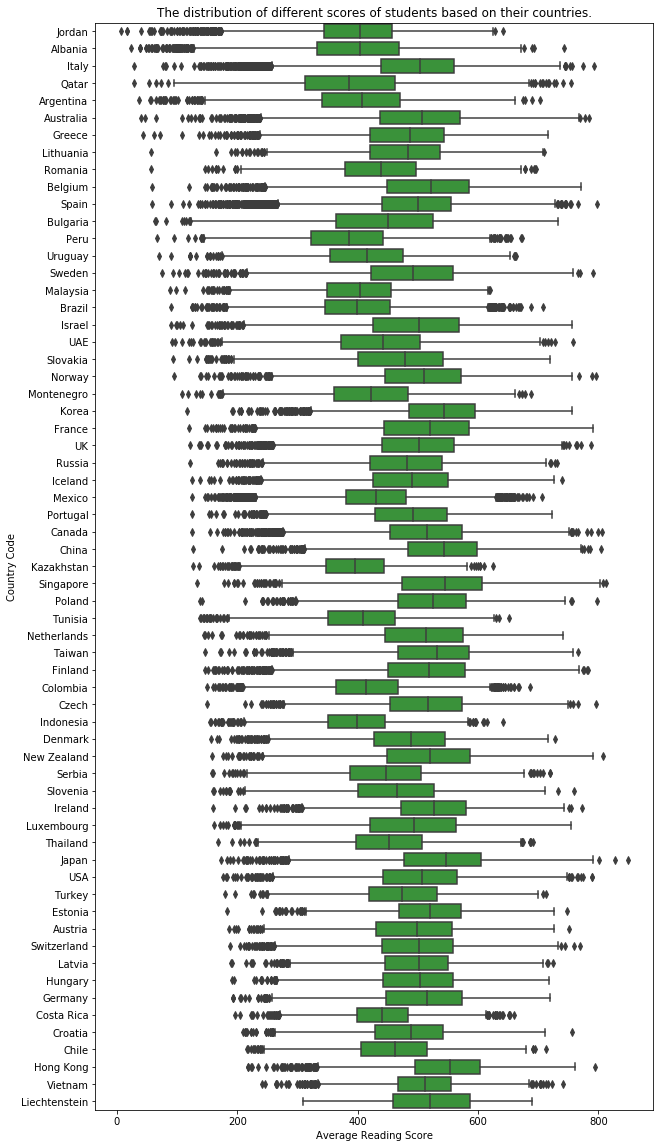

In [48]:
plt.figure(figsize = [10, 20])
df_sorted = df_clean.sort_values(by='Average Reading Score')
sb.boxplot(x = df_sorted['Average Reading Score'], y = df_sorted['Country Code'], color=sb.color_palette()[2]);
plt.title('The distribution of different scores of students based on their countries.');

### Conclusions

Exploring from the original problem, we got several conclusions as follows:
1. Students with parents will have better study
2. The different national backgrounds of student families, the more outstanding scores for male students.
3. The performance of girls in reading is not only better than that of boys, but also different from the stereotypes of girls. The performance of girls in mathematics and science is no less than that of boys.
4. Finally, in the PISA test, the scores of Asian countries seem to be slightly higher.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

0